# Assignment 3
&copy; 2023, Scripnic Dinu, all rights reserved

## 3.1 Mobile phone picture

In [3]:
# main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# sklearn libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
# scipy libraries
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
# Image processing libraries
from PIL import Image  # i choose pilow because its more lightweight, opencv is more for computer vision and more advanced image processing

### 3.1.1 Data Preparation
* Take a picture with your smartphone. The picture must contain a piece of paper with your name on it and some type of background (walls, floor, window, etc.).
* Resize it to 256x256

Original image size:  (256, 256)


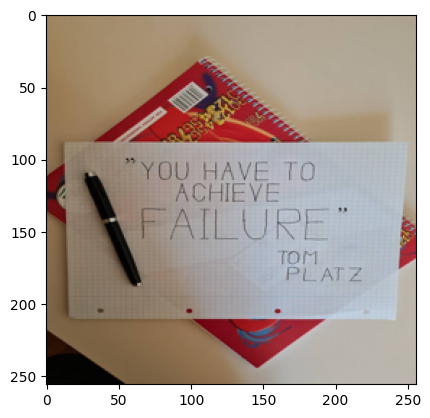

[[159 127  84]
 [159 127  84]
 [160 128  86]
 ...
 [185 178 170]
 [184 177 169]
 [183 176 168]]


In [18]:
# i choose to use pillow because it is easier and more efficient than opencv
# opencv is more for computer vision and other more complex tasks
# open and resize the image
img = Image.open("img.jpg")
img = img.resize((256, 256))
print("Original image size: ", img.size)
plt.imshow(img)
plt.show()
# now in order to use the image we have to convert it to a numpy array
img_array = np.array(img)
pixels = img_array.reshape((-1, 3))
print(pixels)

### 3.1.2 Search for the best K
* Reduce the number of RGB colors in the image by using the k-means algorithm.
* Calculate the SSE for each K between 1 and 10.
* Calculate the Silhouette Coefficient for each K between 1 and 10.

In [19]:
# now we have to use the kmeans algorithm to cluster the pixels
k_list = np.arange(2, 10, 1)
sse = []
silhouette_scores = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(pixels, kmeans.labels_))

### 3.1.3 Visualize the results
* Visualize the results for the best K.

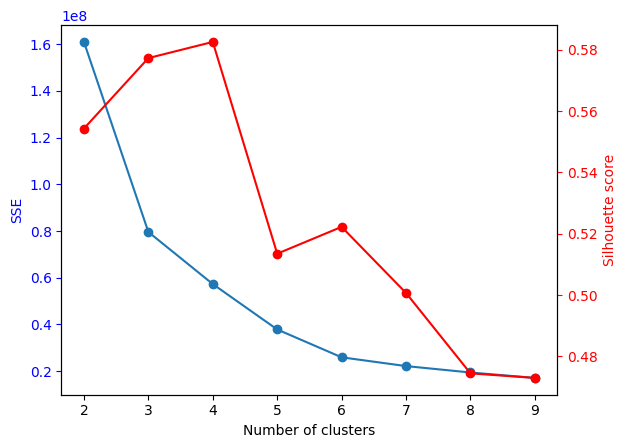

In [20]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the SSE on the primary axis
ax1.plot(k_list, sse, "o-")
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("SSE", color="b")
ax1.tick_params("y", colors="b")

# Plot the silhouette score on the secondary axis
ax2.plot(k_list, silhouette_scores, "ro-")
ax2.set_ylabel("Silhouette score", color="r")
ax2.tick_params("y", colors="r")
plt.show()

#### Conclusion
* Based on the results of the WSS plot evaluated using the Elbow method, the best K is 4.
* Also the Silhouette plot shows that the best K is 4.

### 3.1.4 Generate a new image with the reduced number of colors (Result from 3.1.2)

Original image


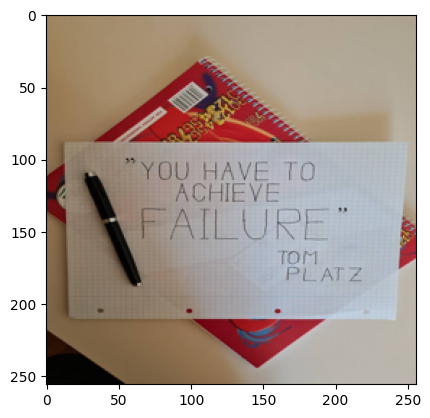

New image with k=4


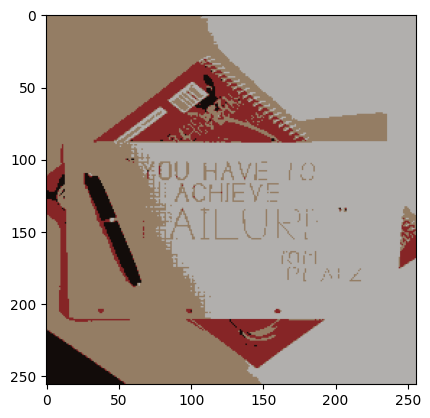

In [6]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
labels = kmeans.labels_
labels = labels.reshape((256, 256))
new_pixels = kmeans.cluster_centers_[labels]
new_img_4 = Image.fromarray(new_pixels.astype(np.uint8), mode="RGB")
# show the old image
plt.imshow(img)
print("Original image")
plt.show()
# show the new image
plt.imshow(new_img_4)
print("New image with k=4")
plt.show()

#### Conclusion
* I consider the result to be quite good.
* The image is recognizable.
* The colors are good, the red of the notebook is quite close to the original one.
* Important to note that T, F, E is not distinguishable from the background. 
* More than that, some letters are a bit broken.

### 3.1.5 Generation of a new image with the reduced number of colors (Personal choice)
* From the Silhouette plot, K=6 seems to be the next good choice if to increase the number of colors.

The original image


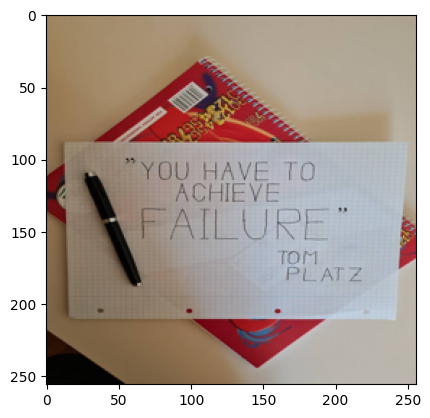

The new image with k = 6


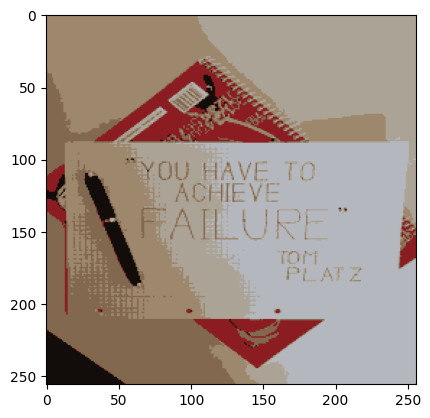

In [9]:
# Show the original image
plt.imshow(img)
print("The original image")
plt.show()
k = 6
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(pixels)
labels = kmeans.labels_
labels = labels.reshape((256, 256))
new_pixels = kmeans.cluster_centers_[labels]
new_img_6 = Image.fromarray(new_pixels.astype(np.uint8), mode="RGB")
# show the new image
plt.imshow(new_img_6)
print("The new image with k = " + str(k))
plt.show()


#### Conclusion
* Further increase of K would give a very limited improvement that would not be worth the time spent.
* From my point of view k = 6 is a better choice than k = 4.
* The colors are more natural and the image is more recognizable.
* Also no more artefacts with the letters.

### 3.1.5 Final conclusion
* Based on WSS plot evaluated using the Elbow method, the best K is 4.
* Based on Silhouette plot, the best K is 4.
* Another good choice would be K=6. based on Silhouette plot.

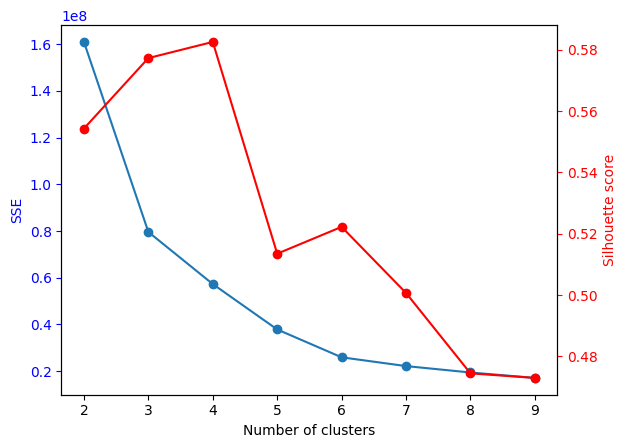

Original image


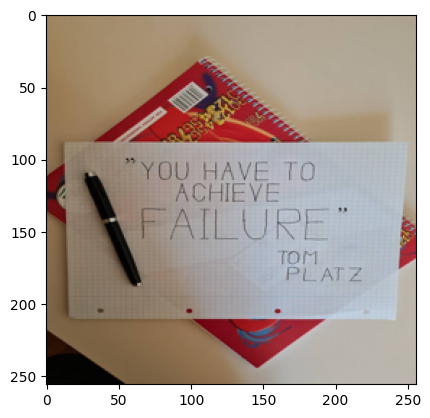

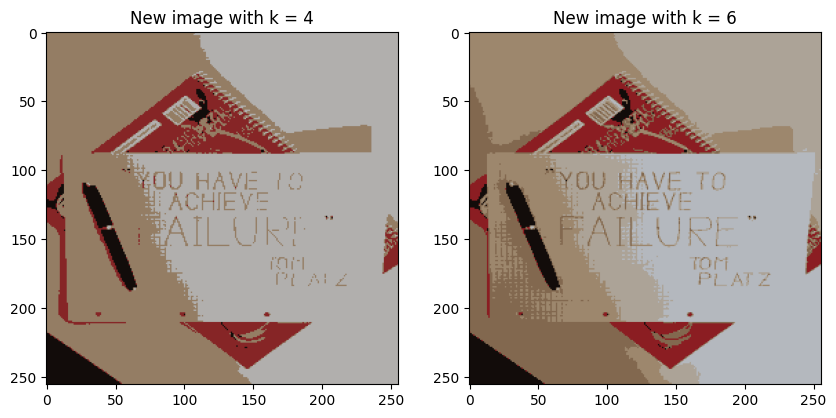

In [10]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the SSE on the primary axis
ax1.plot(k_list, sse, "o-")
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("SSE", color="b")
ax1.tick_params("y", colors="b")

# Plot the silhouette score on the secondary axis
ax2.plot(k_list, silhouette_scores, "ro-")
ax2.set_ylabel("Silhouette score", color="r")
ax2.tick_params("y", colors="r")
plt.show()

print("Original image")
plt.imshow(img)
plt.show()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(new_img_4)
axs[0].set_title("New image with k = 4")
axs[1].imshow(new_img_6)
axs[1].set_title("New image with k = 6")
plt.show()



### 3.1.6 Extra notes regarding the influence of colors on the K
* More colors in the image most of the times leads to a more continuous/less sharp change in WSS graph. This leads to a more difficult decision on the best K value, because the elbow is not as clear.
* On my exeriment with M&M's image, the WSS graph was very continuous, and the elbow was not clear at all.
* Also it leads to a higher required K value, because the colors are more different.
* In such cases, the Silhouette plot is more useful.
* Silhouette plot is VERY SLOW.


## 3.2 Drilling Machine

### 3.2.0 Initial data exploration

Data description:
                x           y
count  400.000000  400.000000
mean     0.415825    0.459285
std      0.248447    0.307058
min     -0.049693   -0.059671
25%      0.191769    0.186190
50%      0.406840    0.402992
75%      0.650679    0.732641
max      0.885153    1.063935
Null values:
x    0
y    0
dtype: int64
The drilling data Scatter plot


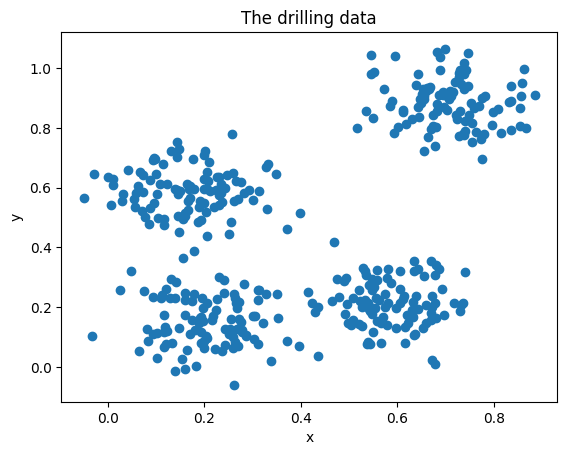

The drilling data boxplot


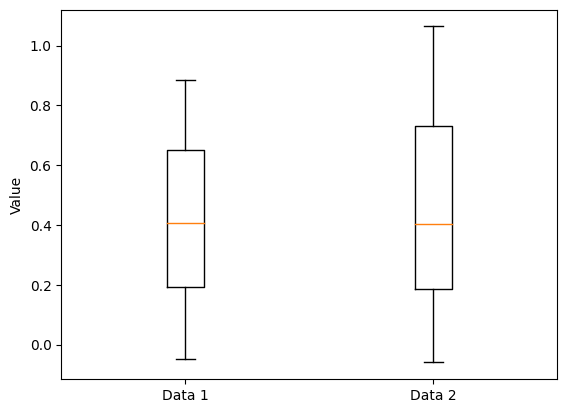

In [4]:
df = pd.read_csv("drilling.csv")
print('Data description:')
print(df.describe())
# print if there are any null values
print('Null values:')
print(df.isnull().sum())
# scatter plot to see the data and understand if it is clustered
plt.scatter(df["x"], df["y"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("The drilling data")
print("The drilling data Scatter plot")
plt.show()
# boxplot to see if there are any outliers
fig, ax = plt.subplots()
ax.boxplot(df)
ax.set_xticklabels(['Data 1', 'Data 2'])
ax.set_ylabel('Value')
print("The drilling data boxplot")
plt.show()

#### Data analysis
* Data contains 2 columns, x and y and 400 observations.
* The data on x varies from -0.05 to 0.88, while the data on y varies from -0.06 to 1.05.
* There are no missing values.
* Data does not contain any outliers.
* Based on the plot we can see that the data is very clustered(it's obvious), so we can use clustering algorithms.

### 3.2.1 K-means clustering
* Visually, the best K is 4.
* We will run a loop to find the best K value.
* Afterwards we will plot the WSS and Silhouette to analyze the results.
* Final step would be to cluster the data and plot the results.

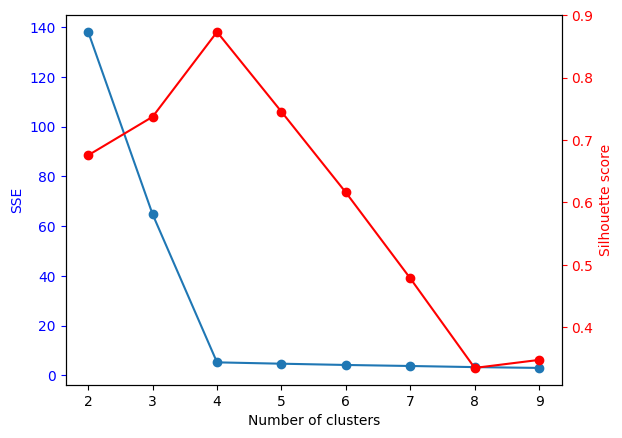

In [6]:
k_list = np.arange(2, 10, 1)
sse = list()
silhouette_scores = list()
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(df)  # initiate the model and fit it
    sse.append(kmeans.inertia_)  # calculate the SSE and append it to the list
    silhouette_scores.append(silhouette_score(df, kmeans.labels_))  # calculate the silhouette score and append it to the list

# Plot the SSE and silhouette score
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# Plot the SSE on the primary axis
ax1.plot(k_list, sse, "o-")
ax1.set_xlabel("Number of clusters")
ax1.set_ylabel("SSE", color="b")
ax1.tick_params("y", colors="b")

# Plot the silhouette score on the secondary axis
ax2.plot(k_list, silhouette_scores, "ro-")
ax1.set_xlabel("Number of clusters")
ax2.set_ylabel("Silhouette score", color="r")
ax2.tick_params("y", colors="r")
plt.show()  # show the plot

#### Conclusion
* Based on the results of the WSS plot evaluated using the Elbow method, the best K is 4.
* Also the Silhouette plot shows that the best K is 4.
* WSS plot and Silhouette proves my initial assumption that the best K is 4.
* K=4 is the best choice by a margin.

          x         y  KM_Cluster
0  0.311910  0.223846           3
1  0.611944  0.859759           1
2  0.566906  0.147251           0
3  0.178646  0.387353           2
4  0.241519  0.247069           3
5  0.683198  0.879005           1
6  0.732084  0.208386           0
7  0.156949  0.495125           2
8  0.218294  0.171284           3
9  0.780914  0.780394           1


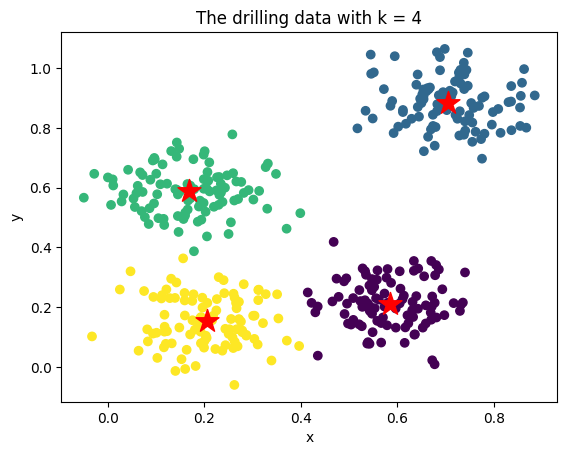

In [5]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

best_k = 4
best_km = KMeans(n_clusters=best_k, random_state=42, n_init=10, max_iter=500).fit(df)
cluster = best_km.predict(df)
df['KM_Cluster'] = cluster
centroids = best_km.cluster_centers_
print(df.head(10))
# Plot all the data and color it according to the cluster
plt.scatter(df["x"], df["y"], c=df["KM_Cluster"])
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.xlabel("x")
plt.ylabel("y")
plt.title("The drilling data with k = 4")
plt.show()

#### Conclusion
* We can see that K = 4 is for sure the best value for this data.
* The plot shows a very clear difference between the clusters.

### 3.2.2 Hierarchical clustering

#### Choosing the best linkage method
* We will run a loop to find the best linkage method.
* Afterwards we will plot the dendrogram to analyze the results.


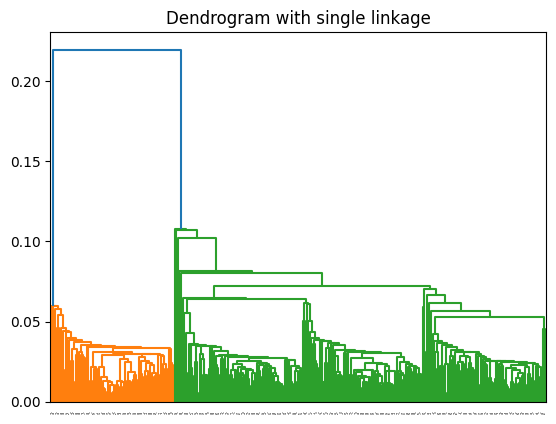

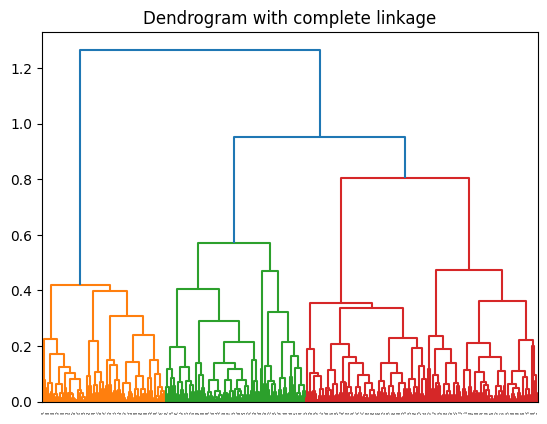

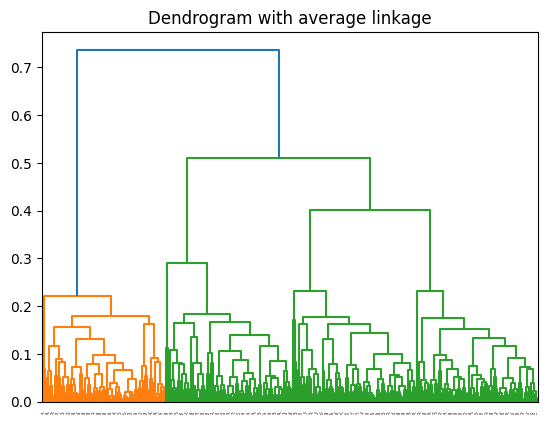

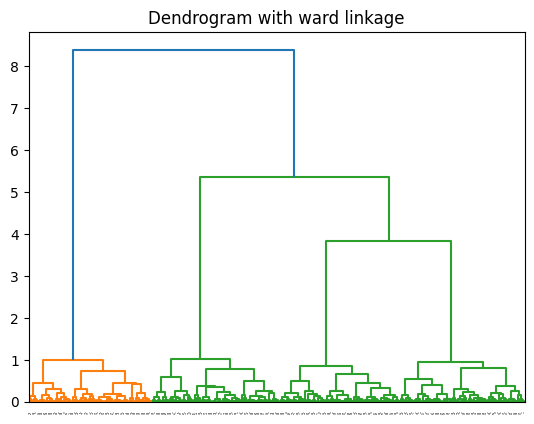

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linkage_methods = ['single', 'complete', 'average', 'ward']
for method in linkage_methods:
    Z = linkage(df[["x","y"]], method=method)
    fig, ax = plt.subplots()
    dendrogram(
        Z,
        leaf_font_size=0
        )
    ax.set_title(f'Dendrogram with {method} linkage')
    plt.show()

#### Conclusion
* Single linkage
    * Clusters are separated in 2 main clusters.
    * Linked the clusters one by one, not first in pairs as the other methods.
    * Very big distance between the main clusters.
    * The dendogram is very unclear and no way we can find the optimal place to cut it.
    * Overall the dendogram is does not look good.
* Complete linkage
    * Clusters are separated in 4 main clusters.
    * Normal distance between the main clusters.
    * Smaller clusters seems separated with big distance.
    * Overall much better than single linkage, but not the best choice.
* Average linkage
    * Clusters are separated in 4 main clusters.
    * Normal distance between the mein clusters.
    * More optimal distance between the smaller clusters.
    * Overall a good choice.
* Ward linkage
    * Clusters are separated in 4 main clusters.
    * The distance in between the small clusters is minimal.
    * The distance between the main clusters is normal.
    * Is the best choice.


### Final clustering
* Based on the dendograms the best choice is Ward linkage.
* I will cut the dendogram at 4 clusters.

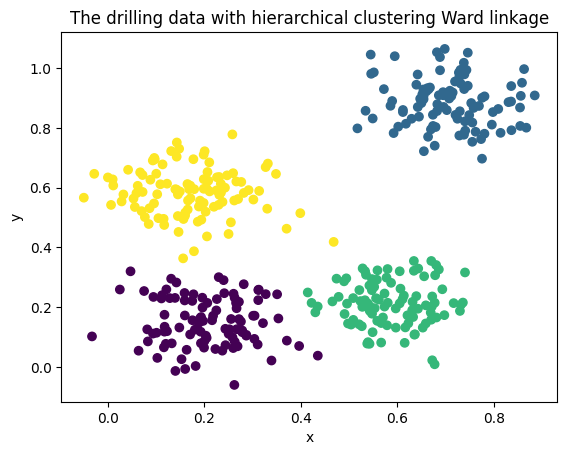

In [65]:
from scipy.cluster.hierarchy import cut_tree, linkage
import matplotlib.pyplot as plt

Z = linkage(df[['x','y']], method='ward')
clusters = cut_tree(Z, height=3)
df['HC_Cluster'] = clusters 
plt.scatter(df["x"], df["y"], c=df["HC_Cluster"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("The drilling data with hierarchical clustering Ward linkage")
plt.show()

### 3.2.3 Denisty based clustering
* Because we have 2 features, the minPts value should be 3 or 4.
* We will run a loop to find the best minPts value.
* Afterwards we will plot the distances.
* Based on the graph we will choose the best eps value. Best eps value occurs when the graph has the biggest change in slope.

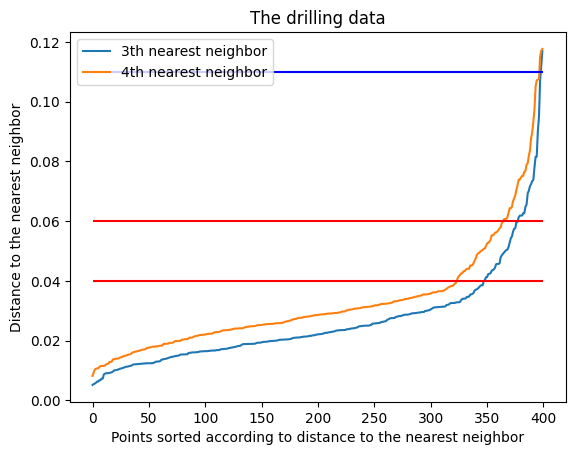

In [17]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

for minPts in [3,4]:
    kNN = NearestNeighbors(n_neighbors=minPts).fit(df[['x','y']])
    distances, indices = kNN.kneighbors(df[['x','y']])
    plt.plot(np.sort(distances[:,minPts-1]), label=f'{minPts}th nearest neighbor')
# draw a horizontal line y=0.04
plt.hlines(y=0.11, xmin=0, xmax=len(df), color='b')
plt.hlines(y=0.04, xmin=0, xmax=len(df), color='r')
plt.hlines(y=0.06, xmin=0, xmax=len(df), color='r')
plt.legend()
plt.xlabel("Points sorted according to distance to the nearest neighbor")
plt.ylabel("Distance to the nearest neighbor")
plt.title("The drilling data")
plt.show()

#### Conclusion
* Based on the results, minPts = 4 is a better choice.
    * IDK why, but i calculated the silhouette score and the difference was 53% in favor of minPts = 4. (0.6 for minPts = 3 and 0.889 for minPts = 4)
    * the minPts of 3 is just shit
* until we achieve the distance of 0.04 the growth is linear.
* In between distance of 0.04 and 0.06 the distance grows polinomialy.
* Based on the plot eps = 0.06 is definetely the best choice.
* After the distance of 0.06, the distance increases exponentially.

minPts = 4, eps = 0.06, number of clusters = 5, silhouette score = 0.8800079744009226


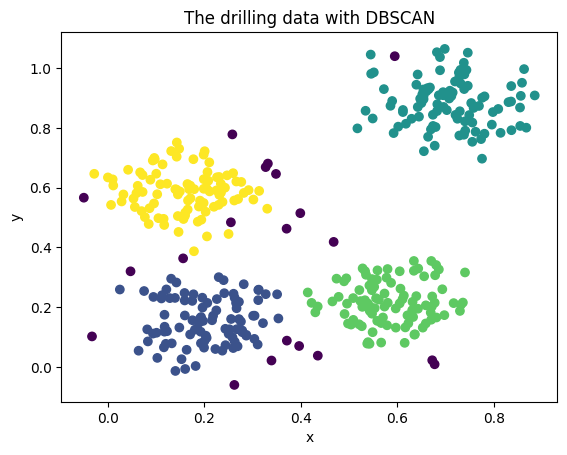

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

minPts = 4
eps = 0.06  # even the smallest change of 0.001 in eps change the silhouette score by 10%
dbscan = DBSCAN(eps=eps, min_samples=minPts).fit(df[['x','y']])
print(f'minPts = {minPts}, eps = {eps}, number of clusters = {len(np.unique(dbscan.labels_))}, silhouette score = {silhouette_score(df, dbscan.labels_)}')
clusters = dbscan.labels_
df['DBSCAN_Cluster'] = clusters
plt.scatter(df["x"], df["y"], c=df["DBSCAN_Cluster"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("The drilling data with DBSCAN")
plt.show()

#### Conclusion
* Based on the scatterplot we have 4 main clusters
* The 20 violet observations seems to be noise.
* The silhouette score of 0.88 i consider to be very good

### 3.2.4 HDBSCAN clustering

In [ ]:
# import hdbscan
# hdb = hdbscan.HDBSCAN().fit(df[['x','y']])  # gives some dumb error ar pip install
...


Ellipsis

### 3.2.5 Optics clustering

In [ ]:
...

Ellipsis